 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 6. MLP Basis**
# Section 6. BackPropagation Calculation

### _Objective_
1. 오차역전파법을 계산하는 방법 중 하나인 Computational Graph(계산 그래프)로 BackPropagation을 배워보도록 하겠습니다. <br>
  
╚═════════════════════════════════════════╝

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

<br><br>

# \[ 1. 계산그래프란? \]

----

----

> *.**계산 그래프**란, 텐서플로우의 그래프(graph)와 같이 Node와 Edge로 수식을 정의하는 방법을 의미합니다.*

<br>

## 1. 계산그래프로 수식 정의 하기

* 단순한 수식을 통해, 계산그래프를 정의하도록 하겠습니다.

$$
f(x,y,z) = (x + y)*z
$$

### (1) 수식을 그래프로 나타내기

![Imgur](https://i.imgur.com/5BcvlA3.png)

### (2) 계산 그래프로 순전파(FeedForward) 적용하기
$ x=-2, y=5, z=-4 $일 때, $f(x,y,z)$의 결과를 구해주세요.

![Imgur](https://i.imgur.com/tT7d1wr.png)

위와 같이 순서 대로 하나씩 계산을 적용하면 됩니다.

<br><br>

# \[ 2. 계산 그래프로 기울기 계산하기 \]

----

----

> *계산 그래프로 기울기를 계산하기 위해서는 몇 가지 주요 미분 법칙을 알아야 합니다.*<br>
> *가장 기본이 되는 수식을 위주로 파악하겠습니다.*<br>

## 1. 연쇄 법칙

---


### (1) 연쇄 법칙 정의

연쇄 법칙은 합성 함수의 미분에 대한 성질이며, 다음과 같이 정의됩니다.

> 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 구성된다.

$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} * \frac{\partial t}{\partial x} 
$$

### (2) 연쇄 법칙으로 수식 풀어보기

$z = (x+y)^2$라는 수식을 연쇄법칙으로 풀어보도록 하겠습니다.

$$
t = x+y \\
z = t^2
$$

으로 나눌 수 있습니다.

연쇄법칙을 적용하면
$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t}*\frac{\partial t}{\partial x}
$$

각각의 편미분($\frac{\partial z}{\partial t}$,$\frac{\partial t}{\partial x}$)은 아래와 같이 구할 수 있습니다.

$$
\frac{\partial z}{\partial t} = 2t, \\
\frac{\partial t}{\partial x} = 1,
$$
위에서 구한 편미분을 통해 우리는 아래와 같이 구할 수 있습니다.

$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t}*\frac{\partial t}{\partial x} = 2t * 1 = 2(x+y)
$$

### (3) 계산 그래프로 수식 풀어보기

![Imgur](https://i.imgur.com/C04Pzi8.png)

연쇄법칙에 따라 하나씩 풀어 쓰면 아래와 같습니다.

![Imgur](https://i.imgur.com/xfuWFnF.png)

각 부분의 편미분 수식을 적용하면 아래와 같습니다.

![Imgur](https://i.imgur.com/jNfHwx3.png)

### (4) 연쇄 법칙과 역전파 

연쇄 법칙을 일반화해서 계산 그래프에서 본다면, 아래와 같습니다. 

![Imgur](https://i.imgur.com/lotK0Ag.png)

순차적으로 역방향으로 연쇄법칙을 먹인다면 아래와 같습니다.

![Imgur](https://i.imgur.com/P8E5eYg.png)

## 2. 덧셈/곱셈/행렬곱 역전파

---



### (1) 덧셈 노드 역전파

더하기의 미분은 아래와 같습니다.

$$
z = x + y \mbox{일 때,}\\
\frac{\partial z}{\partial x} = 1 \\
\frac{\partial z}{\partial y} = 1 \\
$$

위를 계산그래프로 표현하면 아래와 같습니다.

![Imgur](https://i.imgur.com/Fxm5QF7.png)

### (2) 곱셈 노드 역전파

곱하기의 미분은 아래와 같습니다.

$$
z = x * y \mbox{일 때,}\\
\frac{\partial z}{\partial x} = y \\
\frac{\partial z}{\partial y} = x \\
$$

위를 계산그래프로 표현하면 아래와 같습니다.

![Imgur](https://i.imgur.com/lIyHMvh.png)

### (3) 행렬곱 노드 역전파

Deep Learning에서 연산의 다수를 차지하는 것은 바로 행렬곱 연산 부분입니다.<br>
행렬곱은 $*$와 $+$로 이루어져 있습니다.

행렬곱의 미분은 아래와 같습니다.
$$
Z = X \cdot W \mbox{일 때,}\\
\frac{\partial Z}{\partial X} = W^T \\
\frac{\partial Z}{\partial W} = X^T \\
$$

여기서 주의해야 하는 것은 전치관계입니다. 행과 열이 바뀌어야만 합니다.

![Imgur](https://i.imgur.com/Rd4jCLE.png)

## 3. 활성화 함수 역전파

---


### (1) Sigmoid 역전파

시그모이드 함수 차례입니다. 시그모이드 함수는 아래와 같습니다.

$$
y = \frac{1}{1+exp(-x)}
$$

계산그래프로 구성한다면 아래와 같습니다.

![Imgur](https://i.imgur.com/cfhdqNy.png)

역전파는 아래와 같은 순서대로 진행됩니다.

#### 1 단계

![Imgur](https://i.imgur.com/vXy8ohM.png)

#### 2 단계

![Imgur](https://i.imgur.com/Wp2vUeY.png)

#### 3 단계

![Imgur](https://i.imgur.com/4C8msYE.png)

#### 4 단계

![Imgur](https://i.imgur.com/EjuUNat.png)

#### 수식 정리

Sigmoid의 수식은 아래와 같이 정리됩니다.

$$
\frac{\partial L}{\partial y} * (-y^2) * e^{(-x)} * (-1) = \frac{\partial L}{\partial y} * y^2 * e^{(-x)}\\
= \frac{\partial L}{\partial y}\frac{1}{(1+e^{-x})^2}*e^{(-x)}\\
= \frac{\partial L}{\partial y}\frac{1}{(1+e^{-x})}*\frac{e^{(-x)}}{1+e^{(-x)}}\\
= \frac{\partial L}{\partial y}\frac{1}{(1+e^{-x})}*(1 - \frac{1}{1+e^{(-x)}})\\
= \frac{\partial L}{\partial y}y(1-y)
$$

### (2) Relu 역전파

ReLU는 앞서 몇 번 등장했는데, 활성화 함수로 현재 가장 많이 쓰이는 함수 중 하나입니다.<br>

$$
relu(x) = \begin{cases}
x, & \mbox{if x > 0} \\
0, & \mbox{if x <= 0}
\end{cases}
$$

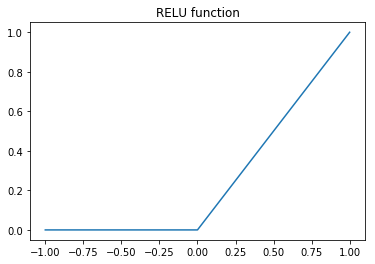

In [9]:
relu = lambda x : np.maximum(x,0)
xs = np.linspace(-1,1,11)
ys = relu(xs)

plt.title('RELU function')
plt.plot(xs,ys)
plt.show()

$$
\frac{\partial relu}{\partial x} = \begin{cases}
1, & \mbox{if x > 0} \\
0, & \mbox{if x <= 0}
\end{cases}
$$

계산그래프로 구성한다면 아래와 같습니다.

![Imgur](https://i.imgur.com/I4eBaJT.png)

## 4. 손실 함수 역전파

---


### (1) Sigmoid-with-Loss 역전파

시그모이드 함수와 binary-Cross-Entropy는 일반적으로 함께 쓰입니다.<br>
나중에 배울 텐서플로우에서도 `tf.losses.sigmoid_cross_entropy`으로 함께 <br>
구현되어 있습니다. 이는 수학적으로도 Gradient 계산이 매우 깔끔하게 떨어지기 때문입니다.

$$
\mbox{sigmoid 함수 : }y = \frac{1}{1+exp(-x)} \\
\mbox{Cross Entropy 함수 : } Loss = -(y_{true}log(y_{pred}) + (1-y_{true})(log(1-y_{pred}))
$$

계산 그래프로 표현하면 아래와 같습니다.

![Imgur](https://i.imgur.com/BtI1Srd.png)

수식으로 미분과정을 계산하면 아래와 같습니다.

$
\frac{\partial L}{\partial z} = \frac{\partial L}{\partial a}\frac{\partial a}{\partial z} \\
= \frac{\partial}{\partial a}\{-ylog(a)+(1-y)log(1-a)\}\frac{\partial a}{\partial z}\\
= \{\frac{-y}{a}+(1-y)\frac{-1}{1-a}\}\frac{\partial a}{\partial z}\\
= \{\frac{-(1-a)y+(1-y)a}{(1-a)a} \}\frac{\partial a}{\partial z}\\
= \frac{(a-y)}{(1-a)a}\frac{\partial a}{\partial z}\\
= a-y\\
\therefore \frac{\partial L}{\partial z} = a-y
$

![Imgur](https://i.imgur.com/3no6oJi.png)

### (1) Mean-Squared-Error 역전파

Linear Regression 등 회귀 문제에서는 주로 MSE 손실함수를 많이 이용합니다.<br>
보통 MSE를 손실함수로 이용할 때, 앞에 $\frac{1}{2}$을 붙이는데,<br>
이는 미분하였을 때 발생하는 2라는 상수를 상쇄시키기 위함입니다.

$$
MSE  = \frac{1}{2}(y_{pred}-y_{true})^2
$$


미분 식은 아래와 같습니다.

$
\frac{\partial MSE}{\partial y_{pred}} = {y_{pred}-y_{true}}\\
$

![Imgur](https://i.imgur.com/nlmliEf.png)

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/01

---